In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Missing Values/loan.csv',usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [3]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [5]:
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the every feature 's frequency

In [6]:
data.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

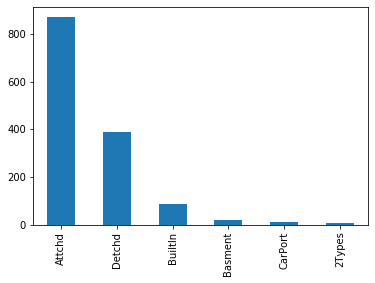

In [7]:
data['GarageType'].value_counts().plot.bar()

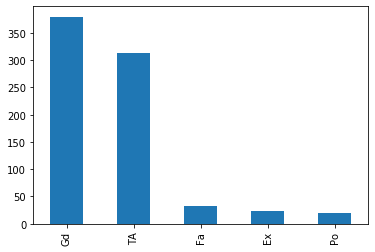

In [8]:
data['FireplaceQu'].value_counts().plot.bar()

In [9]:
data['GarageType'].value_counts().index[0]

'Attchd'

In [10]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [11]:
for i in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(data,i)

In [12]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [13]:
data.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### advantage:
fast and easy
#### dis:
. if lots of nan then we may use mode in an over represented way

. It distort the relation of most frequent label

### Adding variable to capture Nan and replace missing with mode

In [14]:
df = pd.read_csv('Missing Values/loan.csv',usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [15]:
import numpy as np
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [16]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [17]:
fre = df['BsmtQual'].mode()[0]

df['BsmtQual'].fillna(fre,inplace=True)

In [18]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [19]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### Replace Nan with new category called Missing

In [20]:
df_1 = pd.read_csv('Missing Values/loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [21]:
df_1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [22]:
def impute_nan(df,variable):
    df[variable+'newvar'] = np.where(df[variable].isnull(),'Missing',df[variable])

In [23]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df_1,feature)

In [24]:
df_1.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [25]:
df_1=df_1.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [26]:
df_1.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
